# **Advanced Machine Learning Assignment 1**  
**Conor Hayes - 10354355**   
Implemented the Feed Forward algorithm, created the metrics function, sigmoid functions, biases and weights for the Neural Network    

**Oisin McNally - 14376701**   
Implemented the Back Propagation algorithm, created functions to load in the Simple Dataset and the CIFAR dataset and also created the predict function.   

Along with both of our contributions it is worth nothing there was significant debugging of code throughout the assignment that was completed by both people in this group. We heavily dicussed each section of the algorithm and how best to implement it. We both feel that equal effort was put into this assignment by each member of the group.   


In [0]:

import sklearn as sk  
import pickle
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix
import numpy as np  
import matplotlib.pyplot as plt
import pandas as pd
import io
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# **1.0 - Implement a Neural Network from Scratch**
The goal of this part of this assignment is to implement a Neural Network from scratch. Each section below outlines how this goal was met and how we tested the algorithm.

# **1.1 - Data Imports**


Import both data files into the Notebook.


In [0]:
# import data and convert to a dataframe
from google.colab import files
uploaded = files.upload()

#Save data from circles500.csv to a variable data
data = np.genfromtxt(io.StringIO(uploaded['circles500.csv'].decode('utf-8')), delimiter="," , skip_header=True)[:, 0:]


# import data and convert to a dataframe
from google.colab import files
uploaded_cifar = files.upload()


Saving circles500.csv to circles500.csv


Saving data_batch_1 to data_batch_1


# **1.2 - Neural Network Implementation**

Below is the python code to create a Nueral Network with a single hidden layer.

**Activation Function - **We used the signmoid function as our activation function for this assignment and also implemented the deriative of this function for use in the backpropagation alogorithm.   

**Weights - ** 
For this we needed two types of weights. One for the hidden layer, and one for the output layer. These weights were set in the same way, only their size was different. We iniatised the weights by using a function to generate uniform values between 1 and -1.   
The size of the weights of the hidden layer weights were the same as the input layer size by the hidden layer size, to create an equally sized matrix of weights.   
The size of the weights of the output layer weights were the same as the hidden layer size by the output layer size, to create an equally sized matrix of weights.   
These weights were then added to layers of the nueral network in the feedforward layer, and they get updated during backpropagation. The hidden weights are added at the hidden layer and the output weights are added at the output layer
  
 **Bias - **
 For this we need to bias. One to be added to the hidden layer and one to be added to the output before it is passed through the sigmoid. We set these bias's to be a random number between -0.5 and 0.5 and set the sizes to be 1, and the size of the layer it is being used on.
 
 **Algorithm - **   
 There are two parts to the Neural Network.    
 
 1. Feed Forward   
 2. Back Propagation   
    
**Feed Forward -**

Feed Forward is the process of passing training attributes through a Neural Network to obtain a label prediction. The attributes at the input layer are passed to the hidden layer and mutiplied by a uniformly random set of weights with a bias added. The result of this step is then passed through a sigmoid function to reduce the results to a range between 0 and 1. 

This process is repeated at the output where we use a new random set of weights and new bias value. The result is our output of the Neural Network which is a label prediiction for the training cases between 0 and 1. This value will most likely be initially wrong which is where back progpagation is used to train the algorithm by reducing the error between predicted label and actual label. 
![alt text](https://s3.amazonaws.com/stackabuse/media/creating-neural-network-scratch-python-adding-hidden-layers-2.png)
   
*Back Propagation - *   

Back propagation is used to minimize the error between the actual and predicted label. If we take for example the error between the output layer and the hidden layer.

Our cost function depicts how much the weights between the output and hidden layer should be changed by to reduce the error between the predicted and actual output label. 

The delta value gives us the fraction that the predicted output values should be changed by to match the actual output values. This process is repeated and the delta is propagated back to the next layer. In this process the error is distributed amongst all of the layers in the network. 

The changes to weight and bias values are then multiplied by a learning rate to reduce the impact of the changes and cause the convergence to a lower error rate to happen more slowly. This reduces the risk of overshooting the local minimum and helps the mean squared error to reduce at a more consistent rate.

This process is repeated until a local minimum is found or a number of epoch iterations have been completed. 



**References**

[1] - Image - https://s3.amazonaws.com/stackabuse/media/creating-neural-network-scratch-python-adding-hidden-layers-2.png


In [0]:
# -*- coding: utf-8 -*-
"""Machine_Learning_Assignment_1_NN.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/19sKyWBZwV9vtAplu6jTI2mJA7hE4o1qj
"""


np.set_printoptions(linewidth=np.inf)


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def sigmoid_derivative(x):
    return np.multiply(sigmoid(x), 1 - sigmoid(x))


def train_weights(attributes, labels):
    # parameters
    m_error = []
    attributes = attributes
    inputSize = attributes.shape[1]
    outputSize = 1
    hiddenSize = 128

    hidden_weights = np.random.uniform(-1,1,size=(inputSize, hiddenSize))
    output_weights = np.random.uniform(-1,1,size=(hiddenSize, outputSize))
    learning_rate = 0.001
       
    bias_1 = np.random.uniform(-0.5,0.5,size=(1, hiddenSize))
    bias_2 = np.random.uniform(-0.5,0.5,size=(1, outputSize))
    
    for epoch in range(10000):  # epoch is training iterations
        

        # Feed Forward #
        hidden = np.dot(attributes, hidden_weights) + bias_1
        z_hidden = sigmoid(hidden)

        output = np.dot(z_hidden, output_weights) + bias_2
        z_output = sigmoid(output)

        mean_error = ((1 / labels.size) * (np.power((z_output - labels), 2))).sum()
        m_error.append(mean_error)

        #if epoch%50 == 0:
          
        #  print(mean_error)          
         

        # Back Propagation
        # Weights between Output & Hidden Layer
        error_out = z_output - labels
        
        prediction_out = sigmoid_derivative(output)
        delta_out = np.multiply(error_out, prediction_out)
        cost_out = np.dot(z_hidden.T, delta_out)

        # Weights between Hidden Layer & Input Layer
        error_hidden = np.dot(delta_out, output_weights.T)
        prediction_hidden = sigmoid_derivative(hidden)
        delta_hidden = np.multiply(error_hidden, prediction_hidden)
        cost_hidden = np.dot(attributes.T, delta_hidden)

        # Modify Weights
        output_weights -= np.dot(learning_rate, cost_out)
        hidden_weights -= np.dot(learning_rate, cost_hidden)
        
        # Update the bias
        bias_1 -= np.sum(cost_hidden) * learning_rate
        bias_2 -= np.sum(cost_out) * learning_rate


    return hidden_weights, output_weights, bias_1, bias_2, m_error


def predict(hidden_weights, output_weights, bias_1, bias_2, attributes, labels):

    hidden = np.dot(attributes, hidden_weights) + bias_1
    z_hidden = sigmoid(hidden)

    output = np.dot(z_hidden, output_weights) + bias_2
    z_output = sigmoid(output)

    z_output[z_output >= 0.5] = 1
    z_output[z_output < 0.5] = 0
       
    accuracy = (np.sum(z_output == labels) / labels.size) * 100
    print("Prediction Accuracy:", accuracy)
    return z_output, labels

# **1.3 - Generating Metrics**   
Below we have generated 3 standard metric. We will use these metrics throughout this assignment to gain insights into performance of each alogorithm on the Simple Dataset and the CIFAR Dataset The metrics we have generated are    
1. Confustion Matrix   
2. AUC ROC Curve   
3. Error Rate   
   
**Confusion Matrix** -   A Confusion matrix is a table that is used to describe the performance of a classification model. The table has two column and two rows. The rows are True Positives and True Negatives, while the columns are False Positive and False Negatives.   


*   True Positive is a case when we predicted a 1 value and the actual value is 1
*   True Negative is a case when we predicted a 0 value and the actual value is 0
*   False Positive is a case when we predicted a 1 and the actual value is 0
*   False Negative is a case when we predicted a 0 and the actual value is 1  

The best output would be to get all True Positives and True Negatives from running your algorithm.

**AUC ROC Curve** -  ROC is a probability curve. AUC tells us how a well a model can distinguish between two classes. We are looking to achieve a high AUC value and the higher the better, ideally we would like a value of 1.0. The ROC Curve is plotted with True Positive Rate on the y-axis and with False Positve Rate on the x-axis.   

**Error Rate** - Error rate is calculated as the mean error or cost function. To store this metric, we simply passed the mean erro to a list on each iteration of the alogorithm. We used a simple plot, that displays the metric over epochs of the alogorithm. The error rate can tell us alot about the performance of the alogorithm. Ideally the error rate will go down with time and eventually converge. But if these events dont occur we can use this data to see what the issues might be with our alogorithm and allow us to fine tune it. For example if the error rate starts to jump up and down as the the epochs increase can tell us that our learning rate might be diverging and that our learning rate is too high for the number of epochs.

In [0]:
def plot_confusion_matrix(actual, prediction, normalize=False, title='Confusion matrix', cmap=plt.cm.YlGnBu):
    
    confusion_mat = confusion_matrix(actual, prediction)
    np.set_printoptions(precision=2)
    classes = 0,1
    
    plt.subplot(1, 1, 1)
    plt.imshow(confusion_mat, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.title('Confusion Matrix')
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

In [0]:
def plot_ROC(predicted, actual):
    false_p, true_p, thresholds = roc_curve(actual, predicted)
    roc_auc = auc(false_p, true_p)
    
    plt.subplot(1, 1, 1)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_p, true_p, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [0]:
def plot_ErrorRate(errorOverEpochs):
    
    plt.subplot(1, 1, 1)
    plt.plot(errorOverEpochs)
    plt.title('Error Rate over Epochs')
    plt.ylabel('Error')
    plt.xlabel('Epochs')
    plt.xlim(1, len(errorOverEpochs))
    plt.ylim(0, max(errorOverEpochs))
    plt.show()

#**2.0 - Testing the Nueral Network on a Simple Dataset - **  
To test our algorithm we were give a Simple Data set with 4 attributes and 1 output. We passed this dataset into our algorithm. Below outlines the output and results from loading this data set. The algorithm was ran for 1000 epochs. We trained the alogithm on 350 instances of the data and then we tested the algorithm on 150 instances of the data.

# **2.1.1 - Testing on a Simple Dataset**

In [0]:
def load_Data():
      # import data and convert to a dataframe
    #data = pd.read_csv('circles500.csv')

    # Split data into test and training
    test_data = data[:150]
    train_data = data[350:]
    test_data = np.matrix(test_data)
    train_data = np.matrix(train_data)

    # Process data to be passed to the NN
    train_attributes = train_data[:, 0:train_data.shape[1] - 1]
    train_labels = train_data[:, train_data.shape[1] - 1]
    test_attributes = test_data[:, 0:test_data.shape[1] - 1]
    test_labels = test_data[:, test_data.shape[1] - 1] 
    
    return test_data, train_data, test_attributes, train_attributes, train_labels, test_labels

In [0]:
test_data, train_data, test_attributes, train_attributes, train_labels, test_labels = load_Data()
hidden_weights, output_weights, bias_1, bias_2, m_error = train_weights(train_attributes, train_labels)
prediction, actual = predict(hidden_weights, output_weights, bias_1, bias_2, test_attributes, test_labels)


Prediction Accuracy: 100.0


# **2.1.2 - Metrics for Simple Dataset**

Below we have plotted the Confusion Matrix, ROC Curve and Error Rate for our Nueral Network when it is applied to the Simple Dataset


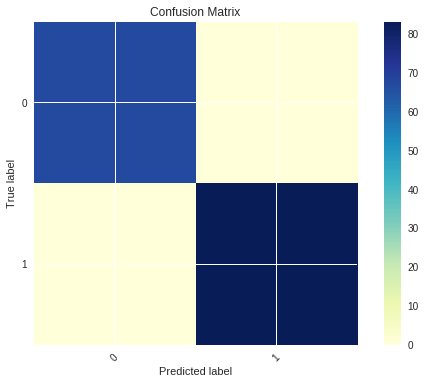

In [0]:
plot_confusion_matrix(prediction, actual)

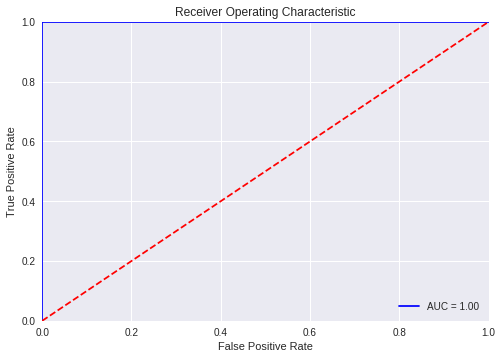

In [0]:
plot_ROC(prediction, actual)

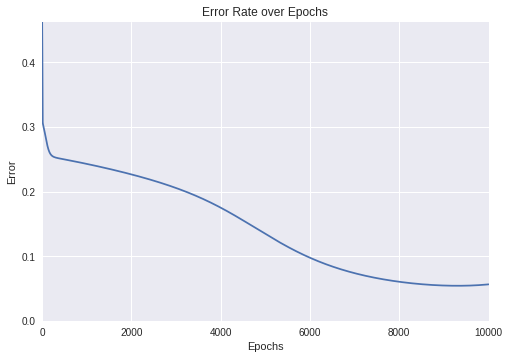

In [0]:
plot_ErrorRate(m_error)

# **2.1.3 - Results for Simple Dataset**   
We ran this algorithm at least 10 times to evaluate its performance. Each time we recieved a value of at least 90% accuarcy with the maximum value we saw being 100% accuary.   
Our metrics tell us alot about the performance of the algorithm.  
*   Confustion Matrix - We can see from the confusion matrix we recieved very high numbers of true positives and true negatives, as they are colored as per the legend on the graph. Over all this table reinforces our accuracy percentage that we calculated.   
*   AUC ROC Curve - We have a AUC value of 1.0. This is the ideal value of 1 and shows no error in this iteration of model, but in previous runs where we have recieved an accuracy of 90% or higher this grpah has been able to display this error. Our ROC curve also shows a high accuracy.    
*   Error Rate - We can see from our error rate that it is constantly decreasing over all the iterations of the algoirthm. It looks as though the error rate would have continued to decrease had we increased the epochs. We can see that we set a good learning rate as our graph decreases without any fluctuations in the line. This leads us to believe we selected a good learning rate. The error rate falls dramatically from epoch 0 to epoch 100 but then decreases steadily from there till the algorithm finishes at epoch 10000. We originally ran this model for 1000,2000,3000,4000 and 5000 epochs and noticed our error would decrease as we went higher with the epochs. We noticed that if we ran the model for 10000 we would get the best results. Our error is very low. But perhaps increasing the hidden layer nodes from 128 would bring the error down in a less number of epochs.    
   
The dataset for this part of the assignment was a simple dataset with small values that were around 0 and there were a small number of attributes. There was little noise in the dataset and it allowed our algorithm to perform at a high rate. This is one of the big benefits of having good data is that it allows you to make excellent predictions with high confidence.

# **3.0 - Testing the Neural Network on a Challenging Dataset**

# **3.1.1 - Testing on the CIFAR Dataset**  
Before final testing the Neural Network we made some slight tweeks to the algorithm.  On initial testing we noticed an overflow error with the sigmoid function. To conteract this we reduced our bias values from -1 to -0.5 and 1 to 0.5. We also normalised the data from the CIFAR dataset by dividing the values by 255.

In [0]:
np.set_printoptions(linewidth=np.inf)


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def sigmoid_derivative(x):
    return np.multiply(sigmoid(x), 1 - sigmoid(x))


def train_weights(attributes, labels):
    # parameters
    m_error = []
    attributes = attributes
    inputSize = attributes.shape[1]
    outputSize = 1
    hiddenSize = 128

    hidden_weights = np.random.uniform(-1,1,size=(inputSize, hiddenSize))
    output_weights = np.random.uniform(-1,1,size=(hiddenSize, outputSize))
    learning_rate = 0.0001
       
    bias_1 = np.random.uniform(-0.5,0.5,size=(1, hiddenSize))
    bias_2 = np.random.uniform(-0.5,0.5,size=(1, outputSize))
    
    for epoch in range(10000):  # epoch is training iterations
        
        

        # Feed Forward #
        hidden = np.dot(attributes, hidden_weights) + bias_1
        z_hidden = sigmoid(hidden)

        output = np.dot(z_hidden, output_weights) + bias_2
        z_output = sigmoid(output)

        mean_error = ((1 / labels.size) * (np.power((z_output - labels), 2))).sum()
        m_error.append(mean_error)       

        # Back Propagation
        # Weights between Output & Hidden Layer
        error_out = z_output - labels
        
        prediction_out = sigmoid_derivative(output)
        delta_out = np.multiply(error_out, prediction_out)
        cost_out = np.dot(z_hidden.T, delta_out)

        # Weights between Hidden Layer & Input Layer
        error_hidden = np.dot(delta_out, output_weights.T)
        prediction_hidden = sigmoid_derivative(hidden)
        delta_hidden = np.multiply(error_hidden, prediction_hidden)
        cost_hidden = np.dot(attributes.T, delta_hidden)

        # Modify Weights
        output_weights -= np.dot(learning_rate, cost_out)
        hidden_weights -= np.dot(learning_rate, cost_hidden)
        
        # Update the bias
        bias_1 -= np.sum(cost_hidden) * learning_rate
        bias_2 -= np.sum(cost_out) * learning_rate


    return hidden_weights, output_weights, bias_1, bias_2, m_error


def predict(hidden_weights, output_weights, bias_1, bias_2, attributes, labels):

    hidden = np.dot(attributes, hidden_weights) + bias_1
    z_hidden = sigmoid(hidden)

    output = np.dot(z_hidden, output_weights) + bias_2
    z_output = sigmoid(output)

    z_output[z_output >= 0.5] = 1
    z_output[z_output < 0.5] = 0
       
    accuracy = (np.sum(z_output == labels) / labels.size) * 100
    print("Prediction Accuracy:", accuracy)
    return z_output, labels
  

In [0]:
def load_CIFAR_data():   
    file = io.BytesIO(uploaded_cifar['data_batch_1'])
    data = pickle.load(file, encoding='latin1')
    attributes = data['data']
    labels = data['labels']

    # retain first 1024 values (the red channel)
    attributes = [image[0:1024] for image in attributes]

    # subset attributes and labels. only need airplane (label = 0) and frog (label = 6) classes
    indexes = [index for index in range(len(labels)) if (labels[index] == 0 or labels[index] == 6)]
    attributes = [attributes[index] for index in indexes]
    labels = [labels[index] for index in indexes]
    
    
    for key, val in enumerate(labels):
      if val == 6:
        labels[key] = 1

    train_attributes = np.matrix(attributes[300:]) / 255 # normalise for overflow error
    train_labels = np.matrix(labels[300:]).T
    
    test_attributes = np.matrix(attributes[:300]) / 255 # normalise
    test_labels = np.matrix(labels[:300]).T
    
    return train_attributes, test_attributes, train_labels, test_labels

In [0]:
cifar_train_attributes, cifar_test_attributes, cifar_train_labels, cifar_test_labels = load_CIFAR_data()
cifar_hidden_weights, cifar_output_weights, cifar_bias_1, cifar_bias_2, cifar_m_error = train_weights(cifar_train_attributes, cifar_train_labels)
cifar_prediction, cifar_actual = predict(cifar_hidden_weights, cifar_output_weights, cifar_bias_1, cifar_bias_2, cifar_test_attributes, cifar_test_labels)

Prediction Accuracy: 73.0


# **3.1.2 - Metrics for CIFAR Dataset**
Below we have plotted the Confusion Matrix, ROC Curve and Error Rate for our Nueral Network when it is applied to the CIFAR Dataset

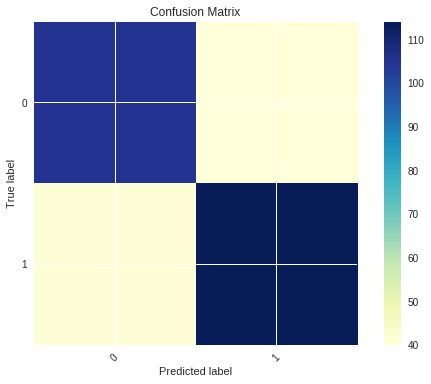

In [0]:
plot_confusion_matrix(cifar_prediction, cifar_actual)

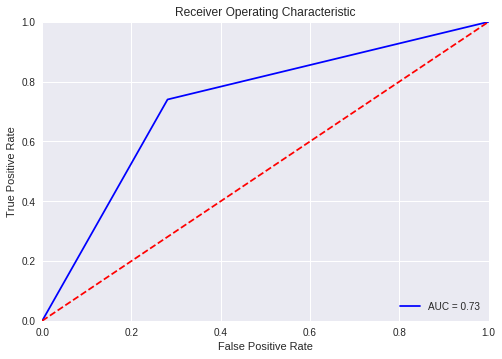

In [0]:
plot_ROC(cifar_prediction, cifar_actual)

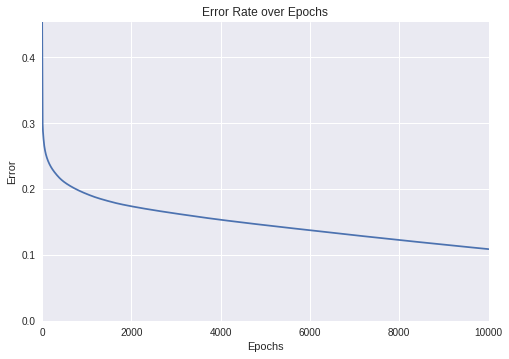

In [0]:
plot_ErrorRate(cifar_m_error)

# **3.1.4  - Results for CIFAR Dataset**   
We ran this algorithm at least 10 times to evaluate its performance. Each time we recieved a value of at least 68% accuarcy with the maximum value we saw being 75% accuracy.   
Our metrics tell us alot about the performance of the algorithm.  
*   Confustion Matrix - We can see from the confusion matrix we recieved decent numbers of true positives and true negatives, as they are colored as per the legend on the graph. We also noticed that there are also more false positives and false negatives than in the previous dataset. This backs up our accuracy calulcation and we can see we have made some incorrected predictions. Our model has an accuracy of 73% on this data set, and given the quality of the data it is a good evaluation.   
*   AUC ROC Curve - We have a AUC value of 0.73. This is a reasonably good performance, but is signifcantly less accurate when compared with our first data set. The ROC curve conveys the level of error as the blue line is pulled heavily to the right, away from its ideal trajectory as it increases in false positives.    
*   Error Rate - Our error rate performs as it should. As we increase our epochs, the error rate continues to decrease. We ran this model for 10,000 epoch and got the mean error down to around 0.10. We see no jitter on the error rate line, leading us to believe we selected a good learning rate. It would have been worth running this model on this data for maybe 100,000 epochs and see how it performs. It looks like the model had not converged and that better results are possible. But for the sake of time we are happy to report our accuracy rate.  

The data for this part of the assignment was a large and noisey dataset. We were tasked with being able to tell the difference between a frog picture and a airplane picture. As the images in the dataset were blurred. This blur makes this task very difficult and increases the level of error in the model. If we had trained the model for longer maybe it would have gotten better results. But since the image quality was poor our model performed well on the poor dataset.

# **4.0 - Deep Learrning  - Conor Hayes**
**Deep Learning Feature - ReLU Activation Function and Extra Hidden Layer**   


---

The implementation I chose was to implement Rectified Linear Units  (ReLU) as my activation function instead of the sigmoid function used in the sections previous.   
ReLU function is the most heavily used activation function in deep learning currently.  
In the image below [1] we can see ReLU compared with the sigmoid function. Unlike the sigmoid function ReLU is not differenitable at 0. Here, we just take 0 as the value and ignore values less than 0. 
 
![alt text](https://cdn-images-1.medium.com/max/640/1*XxxiA0jJvPrHEJHD4z893g.png)     
   

**ReLU Equations - **   

---


The ReLU equation is below. Here we pass our hidden layer values to the ReLU function in the Feed Forward algorithm. This gives us a vector of max values and zero's.   

![alt text](https://cdn-images-1.medium.com/max/1600/1*_Jo2pajYfG1y5ThUFA3PNA.png) [2]    
Once we have passed all our hidden layer values to the ReLU function we then pass it to the Sigmoid function at the output layer. This is to ensure we still have a probability after the output that is less then 1. So the sigmoid function still plays an essential role in the output of our Neural Network.   
   
Our back propagation layer stays the same, except at our hidden layers again we pass our values to the ReLU derivative. ReLU is not differentiable at 0, so we assign any value that is less than  0 a value of 0 and any value that is greater than or euqal to 0 a value of 1.   
![alt text](https://cdn-images-1.medium.com/max/1600/1*ZD5kma5J-6UabfEwERv_dQ.png) [3]  
This output hugly reduces computation on the hidden layers as the derivative significantly lowers the computational cost. [4]    
Again the output is passed to the sigmoid derivative to ensure we have a probability less than 1 as output.      

  
**Weights and Biases**

---
It is normal practice to not change how you initialize the weights and biases. I implemented this for the simple data set with excellent results. But when I tried to apply these weights I got may errors with the model. I was recieving a high error rates and an overflow on my exp function. I had already normalized the data so it seemed that my sigmoid function was outputting very small values e.g 10-130. In order to work around this problem I decided to evaluate how my weights were set. I found a method called Xavier initialization. [5] Xavier initialization is a trick to help our model converge faster, it also ensure that the weights are given a smaller value initially which was causing my overflow issue. [6]  Instead of initializing our weights with small numbers which are distributed randomly we initialize our weights with mean zero and variance of 2/(number of inputs + number of outputs).

I created the biases with values of 0. Once completing some research it was suggested that started with a bias of 0.01. But I found this had no effect on performance and after reading some articles I tried used biases of 0. [7].   
Using these method I was able to get very good results on the CIFAR dataset without any issue. As of note, I ran an altered version of the algorithm on the simple dataset, this was used to benchmark the algorithm but the finally algorithm is the model ran against the CIFAR dataset.     


**Two Hidden Layers**

---
In addition to add the ReLU activation function, I also added another hidden layer. This was a good exercise in fully understanding Deep Learning. Adding the extra layer was a straight forward exercise and was a variation on the iniatial feed forward and back propagation.   
![alt text](https://cdn-images-1.medium.com/max/640/0*hzIQ5Fs-g8iBpVWq.jpg)[8]   
This is how my model is represented graphically. Two hidden layers sit between the input layer and the output layer. We used the ReLU function at the hidden layers and the sigmoid at the output layer.  Weights and a bias are also added at the hiddens layers also.    
  
**Feed Forward Extra Layer Addidtion -  **   

To add the extra layer to the feed forward algorithm we do the following:   
1. Create the first hidden layer by multipling (Matrix dot product) the input (attributes) with the newly created weights for the first hidden layer.
2. Multiply (Matrix dot product) the output from the first hidden layer (step 1) with the new weights created for the second hidden layer.   
3. Pass the result from step 2 to the ReLU function.   
4. Pass the output from hidden layer 2 to the output function


**Back Propagation Extra Layer Addidtion -  **   

To add the extra layer between the hidden layer 1 and output to the back propagation algorithm we do the following:    
1. Calculate the error at the hidden layer 2 by multipling (Matrix dot product) delta from the output layer by the transpose of the output layers weights.
2. Pass the output from the hidden layer 2 in the feed forward algorithm to the ReLU derivative.  
3. Multiply (Matrix dot product) step 1 by step 2 to give you the delta of the hidden layer 2
4. Multiply (Matrix dot product) the transpose of the hidden 1 after it has been passed to the ReLU function by step 3.  
5. Ensure that you make the required changes to the first hidden layer to ensure it takes the second hidden layer into account.



 **References**   
 
 [1] - Image https://cdn-images-1.medium.com/max/640/1*XxxiA0jJvPrHEJHD4z893g.png   
 [2] - Image https://cdn-images-1.medium.com/max/1600/1*_Jo2pajYfG1y5ThUFA3PNA.png   
 [3] - Image https://cdn-images-1.medium.com/max/1600/1*ZD5kma5J-6UabfEwERv_dQ.png   
 [4] - CT510,7 Advanced Topics in Machine Learning
and Information Retrieva,l NUI Galway, Dr Michael Madden - Topic 3: Deep Learning with
Neural Networks Lecture Slides   
[5] - Delving Deep into Rectifiers:
Surpassing Human-Level Performance on ImageNet Classification. He et al,  https://arxiv.org/pdf/1502.01852.pdf   
[6] -  http://andyljones.tumblr.com/post/110998971763/an-explanation-of-xavier-initialization
[7] - http://cs231n.github.io/neural-networks-2/
[8] - https://cdn-images-1.medium.com/max/640/0*hzIQ5Fs-g8iBpVWq.jpg

# **4.1.1 - Testing on a Simple Dataset**

In [0]:
# -*- coding: utf-8 -*-
"""Machine_Learning_Assignment_1_NN.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/19sKyWBZwV9vtAplu6jTI2mJA7hE4o1qj
"""


np.set_printoptions(linewidth=np.inf)

def sigmoid(x):    
    return 1 / (1 + np.exp(-x))


def sigmoid_derivative(x):
    return np.multiply(sigmoid(x), 1 - sigmoid(x))
  
def ReLU(x):    
    return np.maximum(0, x)

def ReLU_derivative(x):  
    x[x<=0] = 0
    x[x>0] = 1   
    return x


def train_weights_ReLU(attributes, labels):
    # parameters
    m_error = [] 
    attributes = attributes
    inputSize = attributes.shape[1]
    outputSize = 1
    hiddenLayer1_Size = 60
    hiddenLayer2_Size = 60

    hidden_weights_l1 = np.random.uniform(-1,1, size=(inputSize, hiddenLayer1_Size))      
    hidden_weights_l2 = np.random.uniform(-1,1, size=(hiddenLayer1_Size, hiddenLayer2_Size))
    output_weights = np.random.uniform(-1,1, size=(hiddenLayer2_Size, outputSize))    
    
    
  
    #Learning Rate
    learning_rate = 0.0001    
       
    bias_1 = np.random.uniform(-1,1,size=(1, hiddenLayer1_Size))
    bias_2 = np.random.uniform(-1,1,size=(1, hiddenLayer2_Size))
    bias_3 = np.random.uniform(-1,1,size=(1, outputSize))
   
    for epoch in range(2000):  # epoch is training iterations
        

        # Feed Forward #
        # Input layer to first hidden layer
        hidden_1 = np.dot(attributes, hidden_weights_l1) + bias_1        
        z_hidden_1 = ReLU(hidden_1)        
        
        # first hidden layer to second hidden layer
        hidden_2 = np.dot(z_hidden_1, hidden_weights_l2) + bias_2
        z_hidden_2 = ReLU(hidden_2)       

        # second hidden layer to output layer
        output = np.dot(z_hidden_2, output_weights) + bias_3     
        z_output = sigmoid(output)     
             

        mean_error = ((1 / labels.size) * (np.power((z_output - labels), 2))).sum()
        m_error.append(mean_error)        
         

        # Back Propagation
        # Weights between Output & Hidden Layer
        # Output layer to second hidden layer
        error_out = z_output - labels
        prediction_out = sigmoid_derivative(output)
        delta_out = np.multiply(error_out, prediction_out)
        cost_out = np.dot(z_hidden_2.T, delta_out)
        
        # second hidden layer to first hidden layer
        error_hidden_2 = np.dot(delta_out, output_weights.T)
        prediction_hidden_2 = ReLU_derivative(hidden_2)
        delta_hidden_2 = np.multiply(error_hidden_2, prediction_hidden_2)
        cost_hidden_2 = np.dot(z_hidden_1.T, delta_hidden_2) 

        # Weights between first hidden Layer & Input Layer
        error_hidden_1 = np.dot(delta_hidden_2, hidden_weights_l2.T)
        prediction_hidden_1 = ReLU_derivative(hidden_1)
        delta_hidden_1 = np.multiply(error_hidden_1, prediction_hidden_1)
        cost_hidden_1 = np.dot(attributes.T, delta_hidden_1)

        # Modify Weights
        output_weights -= np.dot(learning_rate, cost_out)
        hidden_weights_l2 -= np.dot(learning_rate, cost_hidden_2)
        hidden_weights_l1 -= np.dot(learning_rate, cost_hidden_1)
        
        # Update the bias
        bias_1 -= np.sum(cost_hidden_1) * learning_rate
        bias_2 -= np.sum(cost_hidden_2) * learning_rate
        bias_3 -= np.sum(cost_out) * learning_rate


    return hidden_weights_l1, hidden_weights_l2, output_weights, bias_1, bias_2, bias_3, m_error


def predict_ReLU(hidden_weights_l1, hidden_weights_l2, output_weights, bias_1, bias_2, bias_3, attributes, labels):

    hidden_1 = np.dot(attributes, hidden_weights_l1) + bias_1
    z_hidden_1 = ReLU(hidden_1)
    
    hidden_2 = np.dot(z_hidden_1, hidden_weights_l2) + bias_2
    z_hidden_2 = ReLU(hidden_2)

    output = np.dot(z_hidden_2, output_weights) + bias_3
    z_output = sigmoid(output)

    z_output[z_output >= 0.5] = 1
    z_output[z_output < 0.5] = 0
   
    accuracy = (np.sum(z_output == labels) / labels.size) * 100
    print("Prediction Accuracy:", accuracy)
    return z_output, labels

In [0]:
def load_Data_ReLU():
      # import data and convert to a dataframe
    #data = pd.read_csv('circles500.csv')

    # Split data into test and training
    test_data = data[:150]
    train_data = data[350:]
    test_data = np.matrix(test_data)
    train_data = np.matrix(train_data)

    # Process data to be passed to the NN
    train_attributes = train_data[:, 0:train_data.shape[1] - 1]
    train_labels = train_data[:, train_data.shape[1] - 1]
    test_attributes = test_data[:, 0:test_data.shape[1] - 1]
    test_labels = test_data[:, test_data.shape[1] - 1] 
    
    return train_data, test_data, test_attributes, train_attributes, train_labels, test_labels

In [0]:
test_data_ReLU, train_data_ReLU, test_attributes_ReLU, train_attributes_ReLU, train_labels_ReLU, test_labels_ReLU = load_Data_ReLU()
hidden_weights_l1_ReLU, hidden_weights_l2_ReLU, output_weights_ReLU, bias_1_ReLU, bias_2_ReLU, bias_3_ReLU, m_error_ReLU = train_weights_ReLU(train_attributes_ReLU, train_labels_ReLU)
prediction_ReLU, actual_ReLU = predict_ReLU(hidden_weights_l1_ReLU, hidden_weights_l2_ReLU, output_weights_ReLU, bias_1_ReLU, bias_2_ReLU, bias_3_ReLU, test_attributes_ReLU, test_labels_ReLU)

Prediction Accuracy: 100.0


# **4.1.2 - Metrics for Simple Dataset using Deep Learning Techniques**
Below we have plotted the Confusion Matrix, ROC Curve and Error Rate for our Nueral Network when it is applied to the CIFAR Datase

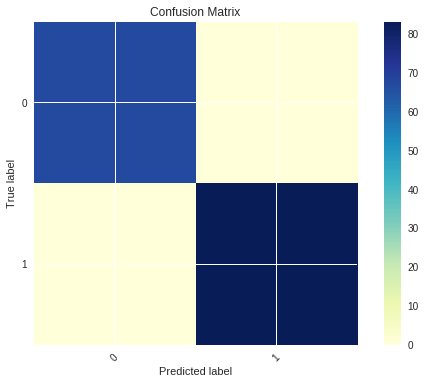

In [0]:
plot_confusion_matrix(prediction_ReLU, actual_ReLU)


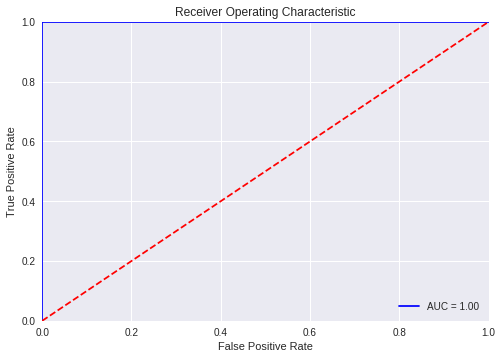

In [0]:
plot_ROC(prediction_ReLU, actual_ReLU)


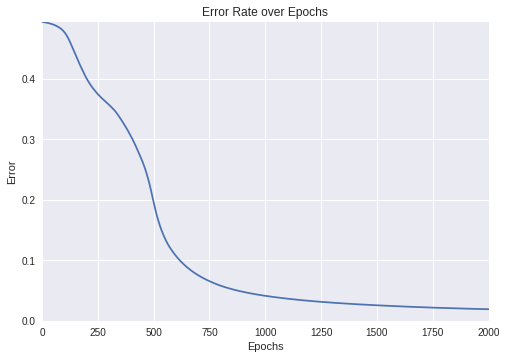

In [0]:
plot_ErrorRate(m_error_ReLU)

# **4.1.3 - Results for Simple Dataset using Deep Learning Techniques**

I ran this algorithm at least 5 times to evaluate its performance on the small data set, and to ensure the ReLU function was running correctly along with the new layer added. Each time we recieved a value of at least 90% accuarcy with the maximum value we saw being 100% accuracy.   
Our metrics tell us alot about the performance of the algorithm.  
*   Confustion Matrix - We can see form the confusion matrix we have perfect acuracy on this run of the model. We have all True Positives and all True Negatives. The algorithm with its enhancements performed well in this instance.  
*   AUC ROC Curve - We have a AUC value of 1.0. This is the ideal score. The ROC curve conveys no level of error we are getting the ideal grpah returned.    
*   Error Rate - The error rate in this instance decends significantly over time. As we increase epochs our rate gets lower and lower to almost zero. Had I continued to run the algorithm it would have returned a much lower value. But I picked this number of epochs for a reason. I noticed as the error rate got lower and lower it started to jump. This leads me to believe that after 2000 or so epochs my error rate became too big, and I needed to lower it. Since I had set a static learning rate it was not possible in this implementation. But some future work could be to measure some sort of decay as the epochs increase and to lower the learning rate based on epochs and some decay measure.  

Testing the enhanced model was merely for show on this data set. This data set was too small to really benefit from the deep learning enhancements and this was simply used as a benchmark to see how the enhancements might effect the neural network. Overall it had no major effect. I received similar if not the same results as before.

## **4.1.4 - Testing on CIFAR Dataset**

In [0]:
# -*- coding: utf-8 -*-
"""Machine_Learning_Assignment_1_NN.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/19sKyWBZwV9vtAplu6jTI2mJA7hE4o1qj
"""


np.set_printoptions(linewidth=np.inf)

def sigmoid(x):
    
    return 1 / (1 + np.exp(-x))


def sigmoid_derivative(x):
    return np.multiply(sigmoid(x), 1 - sigmoid(x))
  
def ReLU(x):    
    return np.maximum(0, x)

def ReLU_derivative(x):  
    # ReLU derivate <= 0 = 0
    # greater than 0 is set to 1
    x[x<=0] = 0
    x[x>0] = 1   
    return x


def train_weights_ReLU(attributes, labels):
    # parameters
    m_error = []
    attributes = attributes
    inputSize = attributes.shape[1]
    outputSize = 1
    hiddenLayer1_Size = 60
    hiddenLayer2_Size = 55    
    
    # Weights following Xavier initialization
    hidden_weights_l1 = np.random.normal(loc=0.0,scale = np.sqrt(2/(inputSize+hiddenLayer1_Size)),size = (inputSize, hiddenLayer1_Size))
    hidden_weights_l2 = np.random.normal(loc=0.0,scale = np.sqrt(2/(hiddenLayer1_Size+hiddenLayer2_Size)),size = (hiddenLayer1_Size, hiddenLayer2_Size))   
    output_weights = np.random.normal(loc=0.0,scale = np.sqrt(2/(hiddenLayer2_Size+1)),size = (hiddenLayer2_Size, 1))    
  
    #Learning Rate
    learning_rate = 0.00001   
    
    # Bias set to 0 initially
    bias_1 = np.zeros(hiddenLayer1_Size)   
    bias_2 = np.zeros(hiddenLayer2_Size)    
    bias_3 = np.zeros(outputSize)
   
    for epoch in range(2000):  # epoch is training iterations       
             
        # Feed Forward #
        # Input layer to first hidden layer
        hidden_1 = np.dot(attributes, hidden_weights_l1) + bias_1        
        z_hidden_1 = ReLU(hidden_1)        
        
        # first hidden layer to second hidden layer
        hidden_2 = np.dot(z_hidden_1, hidden_weights_l2) + bias_2
        z_hidden_2 = ReLU(hidden_2)       

        # second hidden layer to output layer
        output = np.dot(z_hidden_2, output_weights) + bias_3     
        z_output = sigmoid(output)     
             

        mean_error = ((1 / labels.size) * (np.power((z_output - labels), 2))).sum()
        m_error.append(mean_error)
        if epoch%1==0:
          print(mean_error)
          

        # Back Propagation
        # Weights between Output & Hidden Layer
        # Output layer to second hidden layer
        error_out = z_output - labels
        prediction_out = sigmoid_derivative(output)
        delta_out = np.multiply(error_out, prediction_out)
        cost_out = np.dot(z_hidden_2.T, delta_out)
        
        # second hidden layer to first hidden layer
        error_hidden_2 = np.dot(delta_out, output_weights.T)
        prediction_hidden_2 = ReLU_derivative(hidden_2)
        delta_hidden_2 = np.multiply(error_hidden_2, prediction_hidden_2)
        cost_hidden_2 = np.dot(z_hidden_1.T, delta_hidden_2) 

        # Weights between first hidden Layer & Input Layer
        error_hidden_1 = np.dot(delta_hidden_2, hidden_weights_l2.T)
        prediction_hidden_1 = ReLU_derivative(hidden_1)
        delta_hidden_1 = np.multiply(error_hidden_1, prediction_hidden_1)
        cost_hidden_1 = np.dot(attributes.T, delta_hidden_1)

        # Modify Weights
        output_weights -= np.dot(learning_rate, cost_out)
        hidden_weights_l2 -= np.dot(learning_rate, cost_hidden_2)
        hidden_weights_l1 -= np.dot(learning_rate, cost_hidden_1)
        
        # Update the bias
        bias_1 -= np.sum(cost_hidden_1) * learning_rate
        bias_2 -= np.sum(cost_hidden_2) * learning_rate
        bias_3 -= np.sum(cost_out) * learning_rate
        
        

    return hidden_weights_l1, hidden_weights_l2, output_weights, bias_1, bias_2, bias_3, m_error


def predict_ReLU(hidden_weights_l1, hidden_weights_l2, output_weights, bias_1, bias_2, bias_3, attributes, labels):

    hidden_1 = np.dot(attributes, hidden_weights_l1) + bias_1
    z_hidden_1 = ReLU(hidden_1)
    
    hidden_2 = np.dot(z_hidden_1, hidden_weights_l2) + bias_2
    z_hidden_2 = ReLU(hidden_2)

    output = np.dot(z_hidden_2, output_weights) + bias_3
    z_output = sigmoid(output)

    z_output[z_output >= 0.5] = 1
    z_output[z_output < 0.5] = 0   
   
    accuracy = (np.sum(z_output == labels) / labels.size) * 100
    print("Prediction Accuracy:", accuracy)
    return z_output, labels


In [0]:
def load_CIFAR_data_ReLU():   
    file = io.BytesIO(uploaded_cifar['data_batch_1'])
    data = pickle.load(file, encoding='latin1')
    attributes = data['data']
    labels = data['labels']

    # retain first 1024 values (the red channel)
    attributes = [image[0:1024] for image in attributes]

    # subset attributes and labels. only need airplane (label = 0) and frog (label = 6) classes
    indexes = [index for index in range(len(labels)) if (labels[index] == 0 or labels[index] == 6)]
    attributes = [attributes[index] for index in indexes]
    labels = [labels[index] for index in indexes]   
    
    for key, val in enumerate(labels):
      if val == 6:
        labels[key] = 1

    train_attributes = np.matrix(attributes[300:]) / 255
    train_labels = np.matrix(labels[300:]).T
    # preprocessing.normalize
    test_attributes = np.matrix(attributes[:300]) / 255 
    test_labels = np.matrix(labels[:300]).T
    
    return train_attributes, test_attributes, train_labels, test_labels

In [0]:
cifar_train_attributes_ReLU, cifar_test_attributes_ReLU, cifar_train_labels_ReLU, cifar_test_labels_ReLU = load_CIFAR_data_ReLU()
cifar_hidden_weights_l1_ReLU, cifar_hidden_weights_l2_ReLU, cifar_output_weights_ReLU, cifar_bias_1_ReLU, cifar_bias_2_ReLU, cifar_bias_3_ReLU, cifar_m_error_ReLU = train_weights_ReLU(cifar_train_attributes_ReLU, cifar_train_labels_ReLU)


# **4.1.5 - Prediction for Simple Dataset using Deep Learning Techniques**


In [0]:
cifar_prediction_ReLU, cifar_actual_ReLU = predict_ReLU(cifar_hidden_weights_l1_ReLU,
                                                    cifar_hidden_weights_l2_ReLU,
                                                    cifar_output_weights_ReLU,
                                                    cifar_bias_1_ReLU,
                                                    cifar_bias_2_ReLU,
                                                    cifar_bias_3_ReLU,
                                                    cifar_test_attributes_ReLU,
                                                    cifar_test_labels_ReLU)

Prediction Accuracy: 72.0


# **4.1.6 - Metrics for CIFAR Dataset using Deep Learning Techniques**

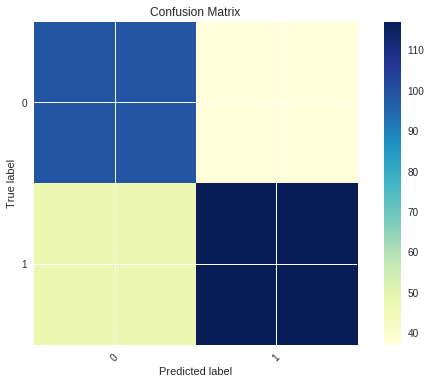

In [0]:
plot_confusion_matrix(cifar_prediction_ReLU, cifar_actual_ReLU)

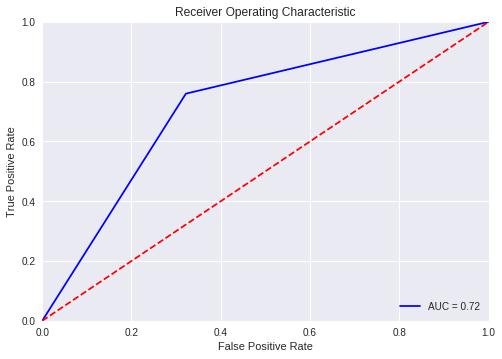

In [0]:
plot_ROC(cifar_prediction_ReLU, cifar_actual_ReLU)

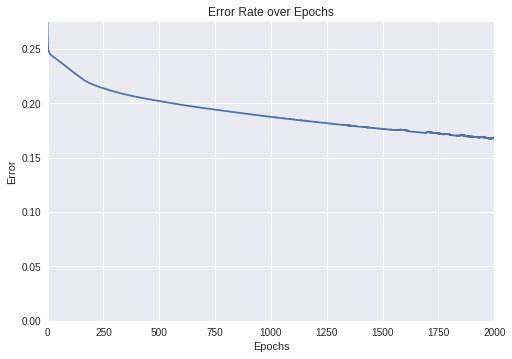

In [0]:
plot_ErrorRate(cifar_m_error_ReLU)

# **4.1.7 - Results for CIFAR Dataset using Deep Learning Techniques**

I ran this algorithm at least 10 times to evaluate its performance on the CIFAR data set, and to ensure the ReLU function was running correctly along with the new layer added. Each time we recieved a value of at least 70% accuarcy with the maximum value we saw being 73% accuracy.   
Our metrics tell us alot about the performance of the algorithm.  
*   Confustion Matrix - We can see we have a good level of accuracy from the confusion matrix. There are high numbers of True Positive and True Negatives while I have some False Positives and False negatives highlighted in bright yellow.  
*   AUC ROC Curve - We have a AUC value of 0.72. The ROC curve conveys no level of error we are getting the ideal grpah returned.    
*   Error Rate - The error rate in this instance decends significantly over time. As we increase epochs our rate gets lower and lower to almost zero. Had I continued to run the algorithm it would have returned a much lower value. But I picked this number of epochs for a reason. I noticed as the error rate got lower and lower it started to jump. This leads me to believe that after 2000 or so epochs my error rate became too big, and I needed to lower it. This is similar to other instances during this assignment. I set the learning rate to be 0.0001, I thought this was more then low enough. But clearly this needs to be refined more in future implementations. As mentioned before some future work could be to implement a model that can adapt its learning rate to reflect the error rate vs epoch vs some sort of decay measure.  

This model performed roughly around the same as the model without any enhancements on the same data set. The biggest difference was number of iterations needed to get the same result. The model with one hidden layer needed 10,000 iterations to achieve its accuracy while this model only used 2000. I did attempt to run this model on 10,000 iterations but the learning rate became too speratic that the final error rate metric was plotting an error rate full of dips and jumps.   
I felt this model performed much better than the model with no enhancements. It needed less iteraitons to get a good result and also it has less computations needed, due to the nature of ReLU.

As a final note, deep neurel networks are very hard to train. So while the results I am seeing here are decent, if I wanted to increase accuracy I would have to think about a better way of training my model. Even after 2000 epochs I am seeing issues with the learning rate. I reall think there is substantial room to improve this model and some future work would be to try and increase the accuary while perhaps implemeting some extra features, while taking a deep dive into the best practices for training deep neural networks.

# **4.2.0 - Oisin McNally**
**Deep Learning Feature - Two Extra Hidden Layers**

Below is the code to implement an extra 2 hidden layers with our Neural Network from previous parts of the assignment.

In [0]:
np.set_printoptions(linewidth=np.inf)

# import data and convert to a dataframe
#data = pd.read_csv('circles500.csv')

# Split data into test and training
test_data = data[:150]
train_data = data[350:]
test_data = np.matrix(test_data)
train_data = np.matrix(train_data)

# Process data to be passed to the NN
train_attributes = train_data[:, 0:train_data.shape[1] - 1]
train_labels = train_data[:, train_data.shape[1] - 1]
test_attributes = test_data[:, 0:test_data.shape[1] - 1]
test_labels = test_data[:, test_data.shape[1] - 1]

def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def sigmoid_derivative(x):
    return np.multiply(sigmoid(x), 1 - sigmoid(x))


def deep_train_weights(attributes, labels):
    # parameters
    m_error = []
    attributes = attributes
    inputSize = attributes.shape[1]
    outputSize = 1
    hiddenSize_1 = 600
    hiddenSize_2 = 450
    hiddenSize_3 = 550

    hidden_1_weights = np.random.uniform(-1,1,size=(inputSize, hiddenSize_1))
    hidden_2_weights = np.random.uniform(-1,1,size=(hiddenSize_1, hiddenSize_2))
    hidden_3_weights = np.random.uniform(-1,1,size=(hiddenSize_2, hiddenSize_3))
    output_weights = np.random.uniform(-1,1,size=(hiddenSize_3, outputSize))
    
    learning_rate = 0.0001
       
    bias_1 = np.random.uniform(-0.5,0.5,size=(1, hiddenSize_1))
    bias_2 = np.random.uniform(-0.5,0.5,size=(1, hiddenSize_2))
    bias_3 = np.random.uniform(-0.5,0.5,size=(1, hiddenSize_3))
    bias_4 = np.random.uniform(-0.5,0.5,size=(1, outputSize))
    
    for epoch in range(200):  # epoch is training iterations
        

        # Feed Forward #
        
        # Input ->> Hidden 1
        hidden_1 = np.dot(attributes, hidden_1_weights) + bias_1
        z_hidden_1 = sigmoid(hidden_1)

        # Hidden 1 ->> Hidden 2
        hidden_2 = np.dot(z_hidden_1, hidden_2_weights) + bias_2
        z_hidden_2 = sigmoid(hidden_2)
        
        # Hidden 2 ->> Hidden 3
        hidden_3 = np.dot(z_hidden_2, hidden_3_weights) + bias_3
        z_hidden_3 = sigmoid(hidden_3)

        # Hidden 3 ->> Output
        output = np.dot(z_hidden_3, output_weights) + bias_4
        z_output = sigmoid(output)
        
        
        # Calculate Mean Error
        mean_error = ((1 / labels.size) * (np.power((z_output - labels), 2))).sum()              
        m_error.append(mean_error)

        # Back Propagation
        
        # Hidden 3 <<- Output
        error_out = z_output - labels
        prediction_out = sigmoid_derivative(output)
        delta_out = np.multiply(error_out, prediction_out)
        cost_out = np.dot(z_hidden_3.T, delta_out)
        
        # Hidden 2 <<- Hidden 3
        error_hidden_3 = np.dot(delta_out, output_weights.T)
        prediction_hidden_3 = sigmoid_derivative(hidden_3)
        delta_hidden_3 = np.multiply(error_hidden_3, prediction_hidden_3)
        cost_hidden_3 = np.dot(z_hidden_2.T, delta_hidden_3)

        # Hidden 1 <<- Hidden 2
        error_hidden_2 = np.dot(delta_hidden_3, hidden_3_weights.T)
        prediction_hidden_2 = sigmoid_derivative(hidden_2)
        delta_hidden_2 = np.multiply(error_hidden_2, prediction_hidden_2)
        cost_hidden_2 = np.dot(z_hidden_1.T, delta_hidden_2)
        
        # Input <<- Hidden 1
        error_hidden_1 = np.dot(delta_hidden_2, hidden_2_weights.T)
        prediction_hidden_1 = sigmoid_derivative(hidden_1)
        delta_hidden_1 = np.multiply(error_hidden_1, prediction_hidden_1)
        cost_hidden_1 = np.dot(attributes.T, delta_hidden_1)

        # Modify Weights
        output_weights -= np.dot(learning_rate, cost_out)
        hidden_3_weights -= np.dot(learning_rate, cost_hidden_3)
        hidden_2_weights -= np.dot(learning_rate, cost_hidden_2)
        hidden_1_weights -= np.dot(learning_rate, cost_hidden_1)
        
        # Update the bias
        bias_1 -= np.sum(cost_hidden_1) * learning_rate
        bias_2 -= np.sum(cost_hidden_2) * learning_rate
        bias_3 -= np.sum(cost_hidden_3) * learning_rate
        bias_4 -= np.sum(cost_out) * learning_rate

    return hidden_1_weights, hidden_2_weights, hidden_3_weights, output_weights, bias_1, bias_2, bias_3, bias_4, m_error


def deep_predict(hidden_1_weights, hidden_2_weights, hidden_3_weights, output_weights, bias_1, bias_2, bias_3, bias_4, attributes, labels):

    # Input ->> Hidden 1
    hidden_1 = np.dot(attributes, hidden_1_weights) + bias_1
    z_hidden_1 = sigmoid(hidden_1)

    # Hidden 1 ->> Hidden 2
    hidden_2 = np.dot(z_hidden_1, hidden_2_weights) + bias_2
    z_hidden_2 = sigmoid(hidden_2)
    
    # Hidden 2 ->> Hidden 3
    hidden_3 = np.dot(z_hidden_2, hidden_3_weights) + bias_3
    z_hidden_3 = sigmoid(hidden_3)
    
    # Hidden 3 ->> Output
    output = np.dot(z_hidden_3, output_weights) + bias_4
    z_output = sigmoid(output)

    z_output[z_output >= 0.5] = 1
    z_output[z_output < 0.5] = 0 
    
   
    accuracy = (np.sum(z_output == labels) / labels.size) * 100
    print("Prediction Accuracy:", accuracy)
    return z_output, labels    
             


def load_CIFAR_data():   
    file = io.BytesIO(uploaded_cifar['data_batch_1'])
    data = pickle.load(file, encoding='latin1')
    attributes = data['data']
    labels = data['labels']

    # retain first 1024 values (the red channel)
    attributes = [image[0:1024] for image in attributes]

    # subset attributes and labels. only need airplane (label = 0) and frog (label = 6) classes
    indexes = [index for index in range(len(labels)) if (labels[index] == 0 or labels[index] == 6)]
    attributes = [attributes[index] for index in indexes]
    labels = [labels[index] for index in indexes]
    
    
    for key, val in enumerate(labels):
      if val == 6:
        labels[key] = 1

    train_attributes = np.matrix(attributes[300:]) / 255 # normalise pixel values to prevent overflow error
    train_labels = np.matrix(labels[300:]).T
    
    test_attributes = np.matrix(attributes[:300]) / 255
    test_labels = np.matrix(labels[:300]).T
    
    return train_attributes, test_attributes, train_labels, test_labels

# **4.2.2 - Test on a Simple Dataset**

In [0]:
hidden_1_weights, hidden_2_weights, hidden_3_weights, output_weights, bias_1, bias_2, bias_3, bias_4, m_error = deep_train_weights(train_attributes, train_labels)
prediction, actual = deep_predict(hidden_1_weights, hidden_2_weights, hidden_3_weights, output_weights, bias_1, bias_2, bias_3, bias_4, test_attributes, test_labels)

Prediction Accuracy: 100.0


# **4.2.3 - Metrics for the Simple Dataset**

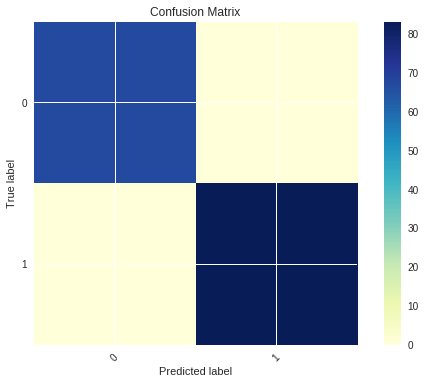

In [0]:
plot_confusion_matrix(prediction, actual)


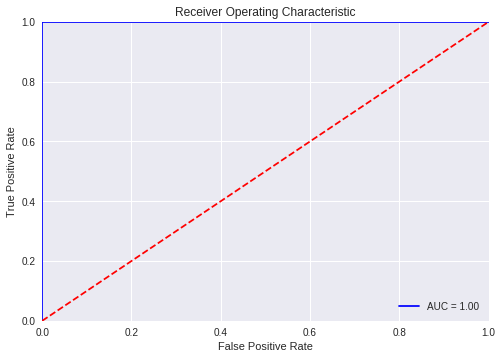

In [0]:
plot_ROC(prediction, actual)


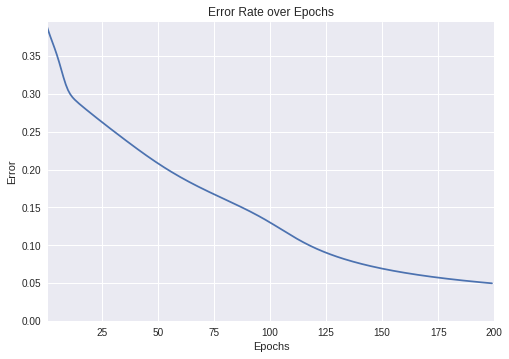

In [0]:
plot_ErrorRate(m_error)

# **4.2.4 - Results for Simple Dataset using Deep Learning Techniques**
For the simple training example the error converge at a much quicker rate which resulted in a perfect prediction accuracy.

Confusion Matrix - the confusion matrix consists only of True Positives and True Negatives giving a predition accuray of 100%.

AUC ROC Curve - The area under the curve has a value of 1 indicating that the predictions were made with 100% accuracy.

Error Rate - The error rate has reduces at a much sharper rate than previously.

The algorith in this example was only run for 200 epoch iterations vs 1000 iterations previously due to the time required to process training for multiple layers. 

However the multiple hidden layers caused the results to predict with a higher accuray (100% vs 71%) and at a reduced number of training iterations. This is undeniable evidence that multiple hidden layers in our case has caused a huge increase in performance of the Neural Network.


# **4.2.5 - Test on a CIFAR Dataset**

In [0]:
cifar_train_attributes, cifar_test_attributes, cifar_train_labels, cifar_test_labels = load_CIFAR_data()
cifar_hidden_1_weights, cifar_hidden_2_weights, cifar_hidden_3_weights, cifar_output_weights, cifar_bias_1, cifar_bias_2, cifar_bias_3, cifar_bias_4, cifar_m_error = deep_train_weights(cifar_train_attributes, cifar_train_labels)
cifar_prediction, cifar_actual = deep_predict(cifar_hidden_1_weights, 
                                              cifar_hidden_2_weights, 
                                              cifar_hidden_3_weights, 
                                              cifar_output_weights, 
                                              cifar_bias_1, 
                                              cifar_bias_2, 
                                              cifar_bias_3, 
                                              cifar_bias_4, 
                                              cifar_test_attributes, 
                                              cifar_test_labels)

Prediction Accuracy: 65.0


# **4.2.6 - Metrics for the CIFAR Dataset**

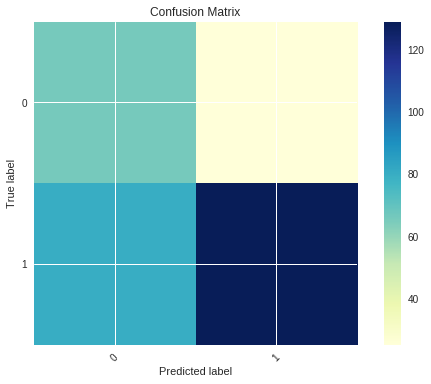

In [0]:
plot_confusion_matrix(cifar_prediction, cifar_actual)


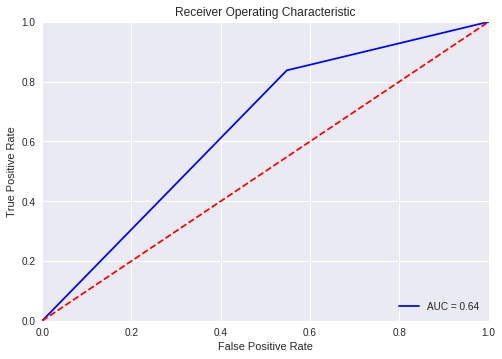

In [0]:
plot_ROC(cifar_prediction, cifar_actual)


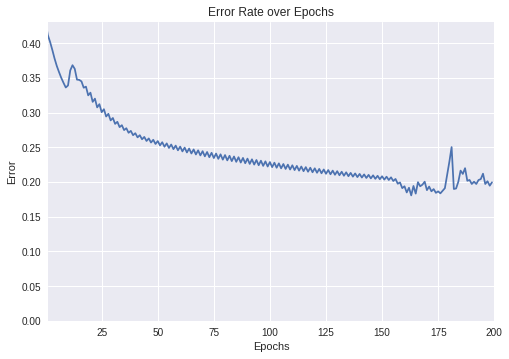

In [0]:
plot_ErrorRate(cifar_m_error)

# **4.2.7 - Results for CIFAR Dataset using Deep Learning Techniques**
The algorithm in this case was run for 200 epoch iterations vs 10,000 iterations in the standard Neural Network.


Confusion Matrix - There is a moderate amount of True Positive and True Negative values which would be expected for an accuracy of 65%. There seems to be a large number of False Negative values and a small number of False Positive values. The training algorithm was not run for many iterations which could be the source of these results. 

AUC ROC Curve - An area of 0.64 indicating a prediction accuracy of around 65%. There is intially a large increase in the True Positive rate which then starts to become more linear as the training continues. 

Error Rate - The reduction in error rate here is initialy very quick before it starts to slow down to a more consistent rate. The results also appear very jagged which could be the result of running the algorithm for a low number of iterations. If the algorithm was run for a high number of iterations the reduction in error rate would appear to be more smooth in the graph. 

To conclude, the algorithm performed worse than previously (65% vs 73%) but was run for a considerably reduced number of training iterations (200 vs 10,000). We could assume that given the time and processing power to run modified algorithm for 10,000 iterations that the error rate would most likly continue to decrease and outperform the original Neural Network alrogithm in terms of prediction acccuracy.